# About the project
With the recent coup that happened in the country of Niger, it got me wondering why such events occur. What I will be exploring and analyzing here to know why coups occur and narrow down to a set of conditions that indicate a "coup inducing atmosphere".

Technically a Coup d'état (French for 'stroke of state'), or simply a coup, is an illegal and overt attempt by the military, other government elites to unseat the incumbent leader or other branches of the government. 

They are important events in the life of a country.

# About the dataset
The data for this project is from [Cline Center Coup d’État Project Dataset](https://databank.illinois.edu/datasets/IDB-3143201) from the Illinois University's data bank.

This dataset identifies the outcomes of coup events (i.e. realized or successful coups, unrealized coup attempts, or thwarted conspiracies) the type of actor(s) who initiated the coup (i.e. military, rebels, etc.), as well as the fate of the deposed leader. This dataset contains information on coups from 1945 (post WW2) onwards.

### Outcomes
* Unrealized Coup - A coup that fails to achieve the effective removal or displacement of the targeted incumbent actor or fails to end their ability to direct national governance. These include:
    1. Coup Conspiracies - A coup plot discovered and disrupted in the planning stages.
    2. Attempted Coups - An initiated coup plot that fails to achieve the effective removal or displacement of the targeted incumbent actor or fails to end their ability to direct national governance.
* Realized Coup - A coup that achieves the effective removal or displacement of the targeted incumbent actor, or ends their ability to direct national governance. The plotters need not accomplish the effective takeover of the state apparatus.

### Coup Typology
There are many kinds of coups. They can be based on the initiating actors or the process or form the coup takes.

1. Military Coup: Coups initiated by military actors who are not a formal part of the governing apparatus. This category does not include security forces, police, or retired/former officers because these groups/people are not part of the military or no longer in the active military.

2. Dissident Coup: Coups initiated by a small group of discontents to include ex-military leaders, religious leaders, former government leaders, members of a legislature/parliament, and civilians. This category does not include security forces or police as they are organized arms of the government.

3. Rebel Coup: Coups initiated by organized, militarized groups that have broken with the existing government and are actively contesting government forces.

4. Palace Coup: Coups initiated by members of a faction within the existing government (i.e., ministers, cabinet members, or other high-ranking people in the executive branch). This does not include members of the legislature/parliament. This category can include military personnel if they are members of a ruling military junta.

5. Foreign-backed Coup: Coups with a foreign power as the force behind the event.

6. Auto Coups: Coups where the existing chief executive takes extreme measures to eliminate, or render powerless, other components of the government (legislature, judiciary, etc.). It also includes situations where the chief executive simply assumes extraordinary powers in an illegal or extra-legal manner (i.e., goes beyond extraordinary measures included in the country’s constitution, such as declaring a state of emergency).

7. Forced Resignations: A soft coup where there is no formal deposing of the chief executive. Instead, the chief executive resigns from his or her position under the imminent threat of illegal or extra-legal removal. If the threat of removal is through legal means spelled out in the constitution, it is not a forced resignation (i.e., President Nixon’s resignation in 1974).

8. Popular Revolt: An irregular regime change driven by widespread popular dissatisfaction expressed through large-scale civil unrest. It is not a popular revolt if elites overthrow incumbents they consider “soft” on dissent to
facilitate a crackdown.

9. Counter Coup: A coup where the newly installed, post-coup leadership is removed by members of the prior regime within one month of the preceding, realized coup.

10. Other: A residual case where the initiators do not fit the above categories (military, rebel, dissident, etc.) or the
actors in a coup are not identified.

### Variables' desciption

| Variable          | Description |
| :---------------- | :---------- |
| coup_id           | Unique number assigned to each event. It consists of the country’s cowcode and the eightdigit date of the event in MMDDYYYY.|
| cowcode           | A unique country code number based on the Correlates of War (COW) country code list.|
| country           | Name of the country where the coup event occurred.|
| year              | Year of the coup event.|
| month             | Month of the coup event.|
| day               | Day of the coup event.|
| event_type        | Indicates whether the event is a coup, attempted coup, or conspiracy.|
| unrealized        | 1 indicates an unsuccessful coup or plot and 0 otherwise.|
| realized          | 1 indicates a successful coup and 0 otherwise.|
| conspiracy        | 1 indicates a coup conspiracy thwarted prior to execution and 0 otherwise.|
| attempt           | 1 indicates a coup was attempted and 0 otherwise.|
| military          | 1 indicates a military coup/attempt/conspiracy and 0 otherwise.|
| dissident         | 1 indicates a dissident coup/attempt/conspiracy and 0 otherwise.|
| rebel             | 1 indicates a rebel coup/attempt/conspiracy and 0 otherwise.|
| palace            | 1 indicates a palace coup/attempt/conspiracy and 0 otherwise.|
| foreign           | 1 indicates a foreign-backed coup/attempt/conspiracy and 0 otherwise.|
| auto              | 1 indicates an auto coup and 0 otherwise.|
| resign            | 1 indicates a forced resignation and 0 otherwise|
| popular           | 1 indicates a popular revolt and 0 otherwise.|
| counter           | 1 indicates a counter-coup and 0 otherwise.|
| other             | 1 indicates the coup event does not fit into any of the above categories or the actors were not identified and 0 otherwise.|
| noharm            | 1 indicates the deposed executive was not injured or killed during the coup event and 0 otherwise.|
| injured           | 1 indicates the deposed executive was injured during the coup event and 0 otherwise.|
| killed            | 1 indicates the deposed executive was killed during the coup event and 0 otherwise.|
| harrest           | 1 indicates the deposed executive was placed under house arrest and 0 otherwise.|
| jailed            | 1 indicates the deposed executive was arrested, detained or jailed and 0 otherwise.|
| tried             | 1 indicates the deposed executive was tried and 0 otherwise.|
| fled              | 1 indicates the deposed executive fled the country and 0 otherwise.|
| exile             | 1 indicates the deposed executive was banished from the country and 0 otherwise.|

# Importing required libraries

In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [48]:
original_df = pd.read_csv('Coup data 2.1.2.csv')
len(original_df['country'].unique())

137

# Processing the data

In [3]:
df_countries = set(original_df['country'])
shapefile_path = 'shape file\\ne_110m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile_path)
world_countries = set(gdf['SOVEREIGNT'])

# Find countries in your DataFrame not present in GeoPandas dataset
diff_df_countries = df_countries - world_countries

print(diff_df_countries)
print(df_countries)
print(world_countries)

{'Yemen PDR', 'Grenada', 'Dominica', 'Rumania', 'German Democratic Republic', 'Swaziland', 'Seychelles', 'Surinam', 'Yemen Arab Republic', 'Bahrain', 'Maldives', 'United States', 'Republic of Korea', 'Czechoslovakia', 'Sao Tome and Principe', 'Republic of Vietnam', 'Serbia', 'USSR', "Cote d'Ivoire", 'Tanzania', 'Comoros', 'Congo'}
{'Iran', 'Cyprus', 'Mongolia', 'Mozambique', 'East Timor', 'Grenada', 'Rumania', 'Seychelles', 'Haiti', 'Iraq', 'Oman', 'Bahrain', 'Peru', 'China', 'Portugal', 'Angola', 'Central African Republic', 'Poland', 'Republic of Korea', 'Sri Lanka', 'Sao Tome and Principe', "Cote d'Ivoire", 'Sierra Leone', 'Gambia', 'Luxembourg', 'Libya', 'Congo', 'Equatorial Guinea', 'Nigeria', 'Burundi', 'Dominican Republic', 'Thailand', 'Yemen PDR', 'Jamaica', 'Indonesia', 'Lebanon', 'Mali', 'Italy', 'Algeria', 'Bolivia', 'Dominica', 'Panama', 'Swaziland', 'Jordan', 'Lesotho', 'Surinam', 'Guatemala', 'Burkina Faso', 'Ukraine', 'Russia', 'Maldives', 'Georgia', 'Ghana', 'Czechoslova

In [4]:
# Grenada, Dominica, Comoros, Seychelles, Bahrain, Sao Tome and Principe, Maldives couldn't be plotted
correct_names = {
    'Serbia': 'Republic of Serbia', 
    'Tanzania': 'United Republic of Tanzania', 
    'Surinam': 'Suriname', 
    'United States': 'United States of America', 
    'German Democratic Republic': 'Germany', 
    'Rumania': 'Romania', 
    'Yemen PDR': 'Yemen', 
    'Czechoslovakia': 'Czechia', 
    "Cote d'Ivoire": 'Ivory Coast',
    'Republic of Korea': 'South Korea',
    'Swaziland': 'eSwatini', 
    'Yemen Arab Republic': 'Yemen', 
    'Republic of Vietnam': 'Vietnam', 
    'USSR': 'Russia',
    'Congo': 'Democratic Republic of the Congo'
    }

for key,value in correct_names.items():
    original_df['country'] = original_df['country'].replace(key, value)
df = original_df.copy()

Methods for plotting the world map and bar plot.

In [5]:
def plot_world_map(dataframe, data_column, title):
    shapefile_path = 'shape file\\ne_110m_admin_0_countries.shp'
    gdf = gpd.read_file(shapefile_path)
    
    merged = gdf.merge(dataframe, left_on='SOVEREIGNT', right_on='country', how='right')
    if 'count' in merged.columns:
        merged['count'].fillna(0, inplace=True)

    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    merged.plot(column=data_column, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    ax.set_title(title)
    ax.set_axis_off()
    plt.show()


In [6]:
def bar_plot(data, x, y, title):
    plt.figure(figsize=(12,6))
    plots = sns.barplot(x=x, y=y, data=data)
    
    # Iterating over the bars one-by-one
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), 
                    ha='center', va='center',
                    size=15, xytext=(0, 8),
                    textcoords='offset points')

    # Add labels and title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   coup_id     981 non-null    object
 1   cowcode     981 non-null    int64 
 2   country     981 non-null    object
 3   year        981 non-null    int64 
 4   month       981 non-null    int64 
 5   day         981 non-null    int64 
 6   event_type  981 non-null    object
 7   unrealized  981 non-null    int64 
 8   realized    981 non-null    int64 
 9   conspiracy  981 non-null    int64 
 10  attempt     981 non-null    int64 
 11  military    981 non-null    int64 
 12  dissident   981 non-null    int64 
 13  rebel       981 non-null    int64 
 14  palace      981 non-null    int64 
 15  foreign     981 non-null    int64 
 16  auto        981 non-null    int64 
 17  resign      981 non-null    int64 
 18  popular     981 non-null    int64 
 19  counter     981 non-null    int64 
 20  other     

In [8]:
df['event_type'].value_counts()

event_type
coup          441
attempted     349
conspiracy    191
Name: count, dtype: int64

The event_type is already covered by the 'realized' (coup), 'conspiracy', 'attempt' columns, so we can drop them.

In [9]:
df.drop(columns=['event_type'], inplace=True)

Are realized and unrealized complementary? If they are we can drop one of them.

In [10]:
if not (df['unrealized'] == df['realized']).any():
    df.drop(columns=['unrealized'], inplace=True)

'coup_id', 'cowcode' are irrelevant to the analysis

In [11]:
df.drop(columns=['coup_id', 'cowcode'], inplace=True)

In [12]:
# for clarity
df.rename(columns={'harrest': 'house_arrest'}, inplace=True)

In [13]:
df.columns

Index(['country', 'year', 'month', 'day', 'realized', 'conspiracy', 'attempt',
       'military', 'dissident', 'rebel', 'palace', 'foreign', 'auto', 'resign',
       'popular', 'counter', 'other', 'noharm', 'injured', 'killed',
       'house_arrest', 'jailed', 'tried', 'fled', 'exile'],
      dtype='object')

# Exploring the data

### The countries that frequently experienced coups.

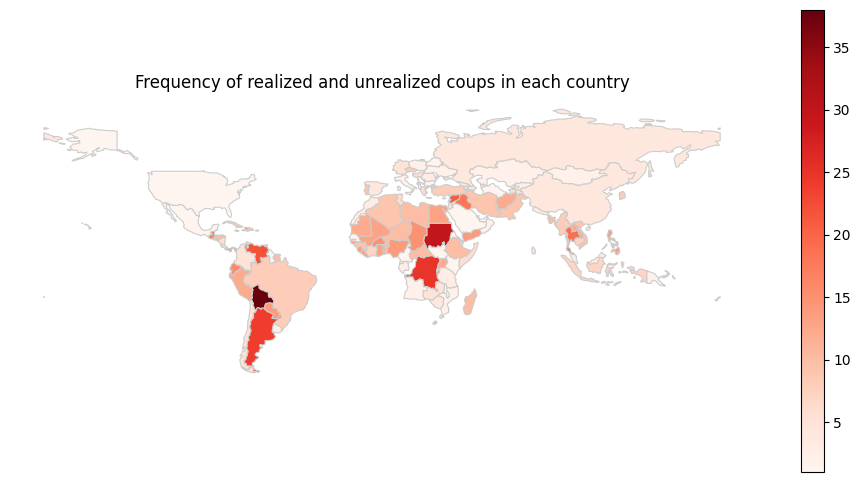

In [14]:
counts = df['country'].value_counts()
total_coups_df = pd.DataFrame({'country': counts.index, 'count': counts.values})
plot_world_map(total_coups_df, 'count', 'Frequency of realized and unrealized coups in each country')

Looking at the above chart, a lot of coups happened in the countries in South America, Africa and the Middle East regions.

The reasons for so many coups and coup attempts is because post WW2 all these countries strated gaining their independence and the borders that were decided might have sat well with the people groups of those countries or there is high tension amongst poeple on the basis of religion, ideology, social and economic inequalities, etc.

The South American nations experienced coups mainly for the and by the left leaning poeple with a lot of unions forming and demanding for equality. The governments always either had a weak foundation or was too corrupt and very bad policy decisions.

Countries like Russia, China, the SE Asian nations like Vietnam, Laos, etc, suffered coups due to ideological differences, especially the capitalist vs communist divide which eventually led to the (long) Cold War.

The Middle East and Persia experienced coups early on due to borders drawn by the European countries after the fall of the Ottoman empire which led to a lot of border conflicts and foreign intervensions. Later on coups were staged on the lines of differences in religion, e.g., the Islamic revolution in Iran, and also civil wars due to political and sectarian tensions like in Lebanon where there is a fight amongst the contry's christians and muslims. The government almost always had a weak foundation leading to frequent resignations and unpopularity among citizens due to lack of enforcement or over-enforcement.

The African continents has seen many coups and they happen very frequently even to this day. The reasons go from weak government and bad policy making to inequality and tensions along religious, tribal and/or sectarian lines.

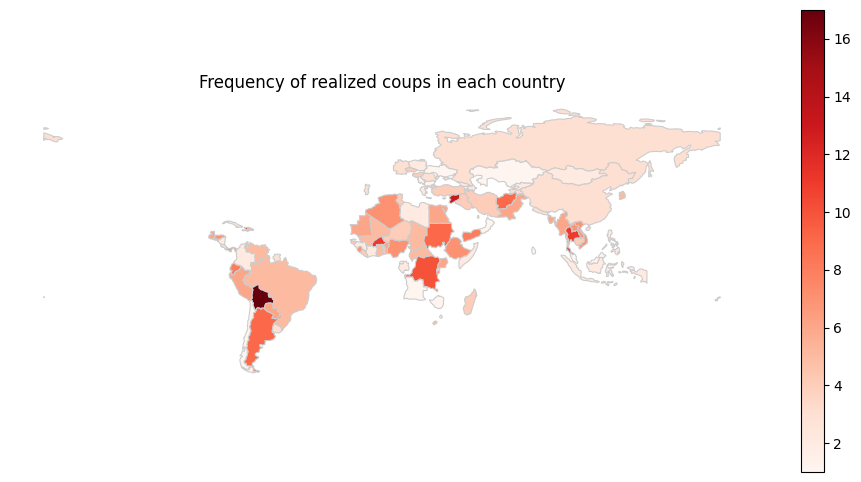

In [18]:
counts = df[df['realized']==1]['country'].value_counts()
successful_coups_df = pd.DataFrame({'country': counts.index, 'count': counts.values})
plot_world_map(successful_coups_df, 'count', 'Frequency of realized coups in each country')

As you may have noticed not all coups are successful in achieving their goals. In fact there are sometimes coups that happen against the coup called a counter-coup. We'll see why.

### Trend of coups occuring by decades.

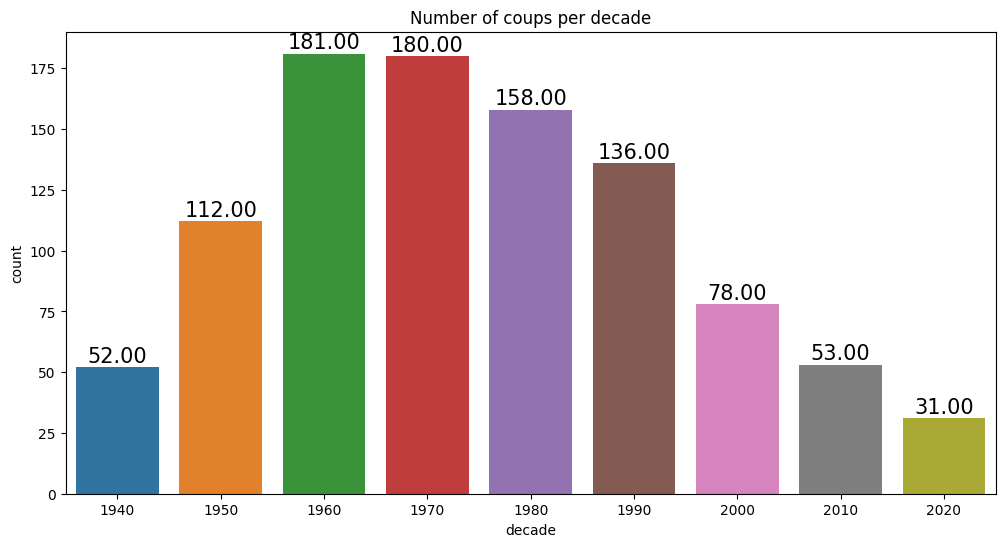

In [19]:
df['decade'] = (df['year'] // 10) * 10
decade_counts = df['decade'].value_counts()
decade_coups_df = pd.DataFrame({'decade': decade_counts.index, 'count': decade_counts.values})
decade_coups_df = decade_coups_df.sort_values(by='decade')
bar_plot(decade_coups_df, 'decade', 'count', 'Number of coups per decade')

Its clear from the graph that majority of the coups that occured are during the Cold War period which lasted from the end of World War II in 1945 until the dissolution of the Soviet Union in 1991. The reason might be:
1. Ideological Competition - Capitalism vs Communism
2. Proxy Conflicts - The Korean War, The Vietnam War
3. Decolonization - Many of the african countries kind of aligned with the USSR to go against their previous colonial rulers.
4. Cold War Alliances - NATO (North Atlantic Treaty Organization) and the Warsaw Pact, created dynamics where member countries were influenced by their alliance partners. Coups were sometimes carried out with the aim of shifting countries' allegiances within these alliances like the Euromaidan Protests in Ukraine in 2013 which was backed by the USA and public's opinion shaped by US's propaganda.
5. Geopolitical Instability - Many regions experienced political instability due to ethnic, religious, or tribal tensions, as well as struggles for power among different factions.

### How often is the miltary involved in the coups and how successful are they and what was the kind of coup was staged?
Beacuse the classical image of a coup is where the military is involved. We'll see often and successful the military is in staging a coup.

% miltary involved: 60.24
% success: 45.35


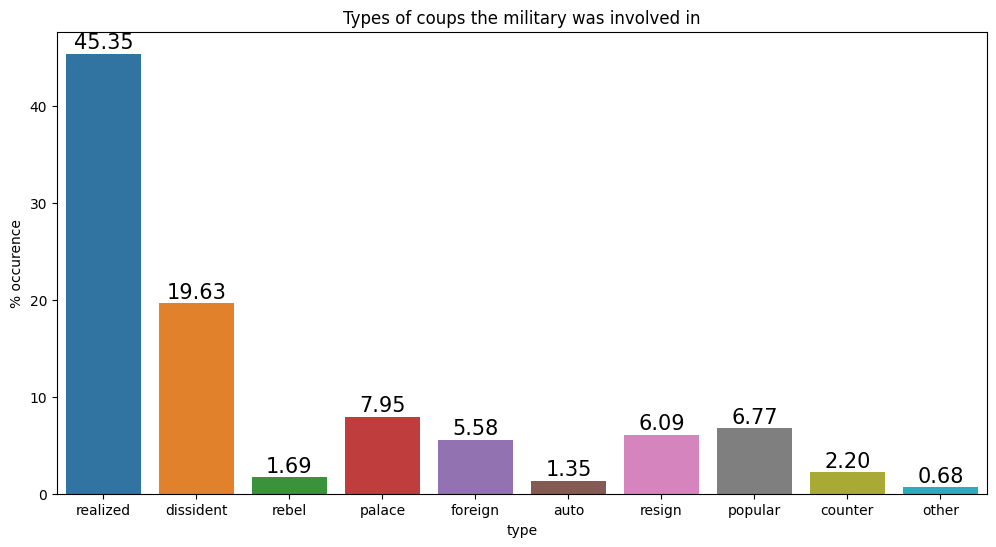

In [21]:
military_df = df[df['military']==1]
counts = df['military'].value_counts()
military_success = military_df['realized'].value_counts()
print("% miltary involved: {:.2f}" .format(counts[1]/(counts[0]+counts[1])*100))
print("% success: {:.2f}" .format(military_success[1]/(military_success[0]+military_success[1])*100))

columns = ['realized', 'dissident', 'rebel', 'palace', 'foreign', 'auto', 'resign', 'popular', 'counter', 'other']
percentages = []
for column in columns:
    counts = dict(military_df[column].value_counts())
    percentages.append(counts[1]/(counts[0]+counts[1])*100)
data = {
    'type': columns,
    '% occurence': percentages
}
bar_plot(data, 'type', '% occurence', 'Types of coups the military was involved in')

The percentages suggest that the military is more often than not involved but not very successful. They are often partnered with ex-officials or the public when staging a coup but even in that most of the time it is within-givernment circle involving present (palace) and ex-government officials.

### How often are coups violent towards the incumbent and who was involved in carrying out the coup?

% violence involved: 5.10
% success: 76.00


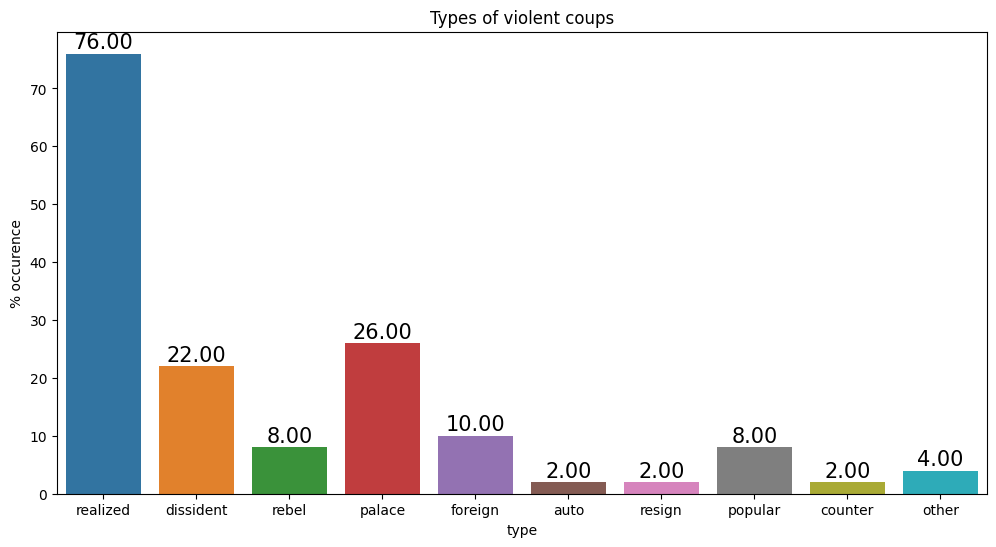

In [22]:
violent_df = df[(df['injured'] == 1) | (df['killed'] == 1)]
success = dict(violent_df['realized'].value_counts())
print("% violence involved: {:.2f}" .format(len(violent_df)/len(df)*100))
print("% success: {:.2f}" .format(success[1]/(success[0]+success[1])*100))
columns = ['realized', 'dissident', 'rebel', 'palace', 'foreign', 'auto', 'resign', 'popular', 'counter', 'other']
percentages = []
for column in columns:
    counts = dict(violent_df[column].value_counts())
    percentages.append(counts[1]/(counts[0]+counts[1])*100)
data = {
    'type': columns,
    '% occurence': percentages
}
bar_plot(data, 'type', '% occurence', 'Types of violent coups')

The graph seems to suggest violence towards the incumbent has a high success rate especially by the present and ex-officials as it is an act of eliminating all the influential people leaving a power vaccum solely for the perpetrators.

### If a coup is successful what happens to the incumbent?

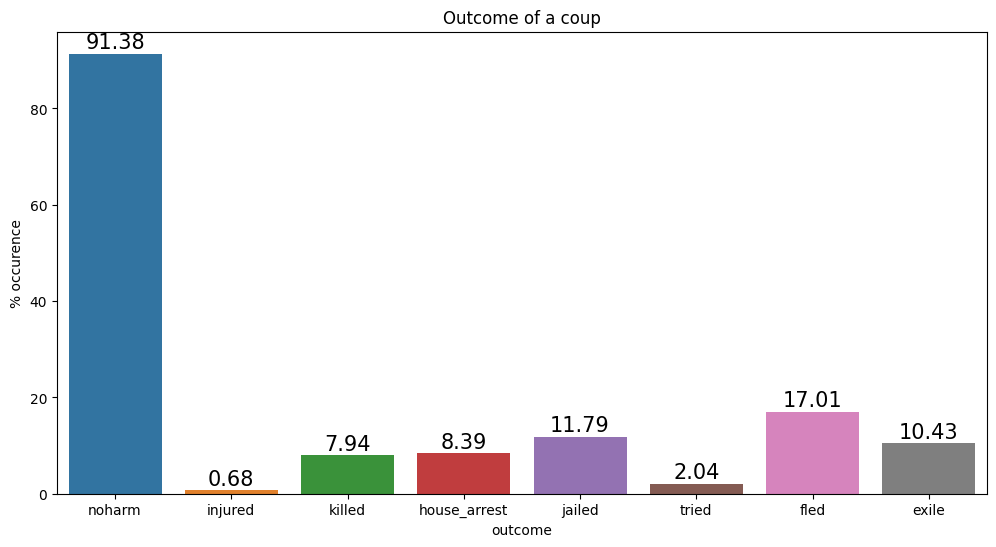

In [31]:
realized_coups_df = df[df['realized']==1]
columns = ['noharm', 'injured', 'killed', 'house_arrest', 'jailed', 'tried', 'fled', 'exile']
percentages = []
for column in columns:
    counts = dict(realized_coups_df[column].value_counts())
    percentages.append(counts[1]/(counts[0]+counts[1])*100)
data = {
    'outcome': columns,
    '% occurence': percentages
}
bar_plot(data, 'outcome', '% occurence', 'Outcome of a coup')

There generally seems to be no harm to the incumbent, and the treatment seems to be on the spot (very less trials in courts). Its either stay in the country in silence or run away into exile.

### Which countries have had auto coups, forced resignations and palace coups? 
Reason as to why I grouped these together is because broadly the group carrying out this coup are within the government circles or governing structure of that country.

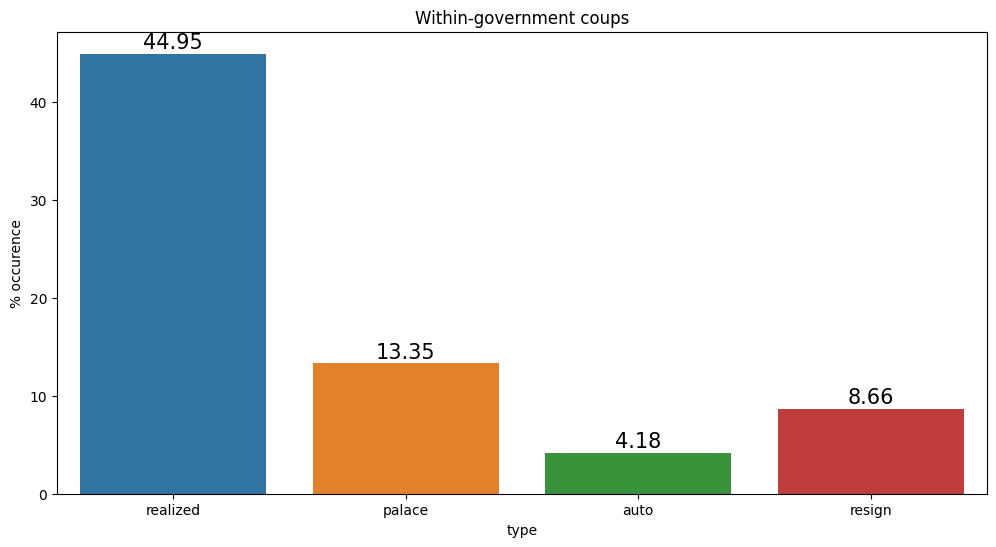

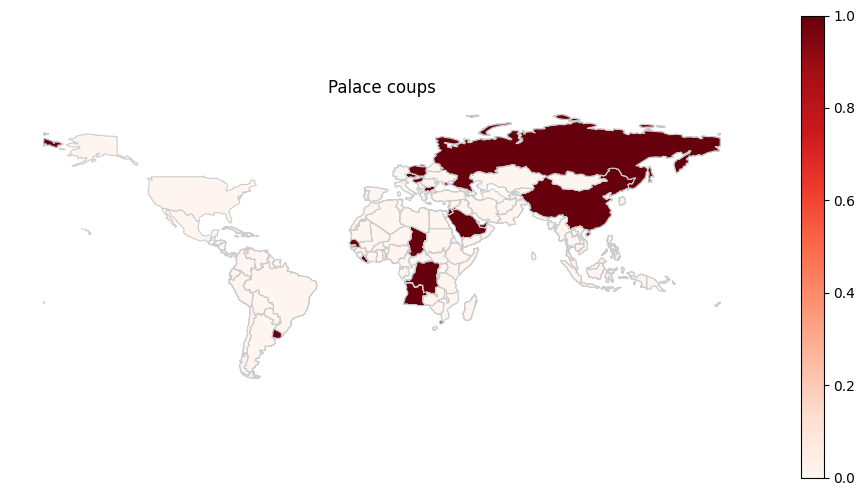

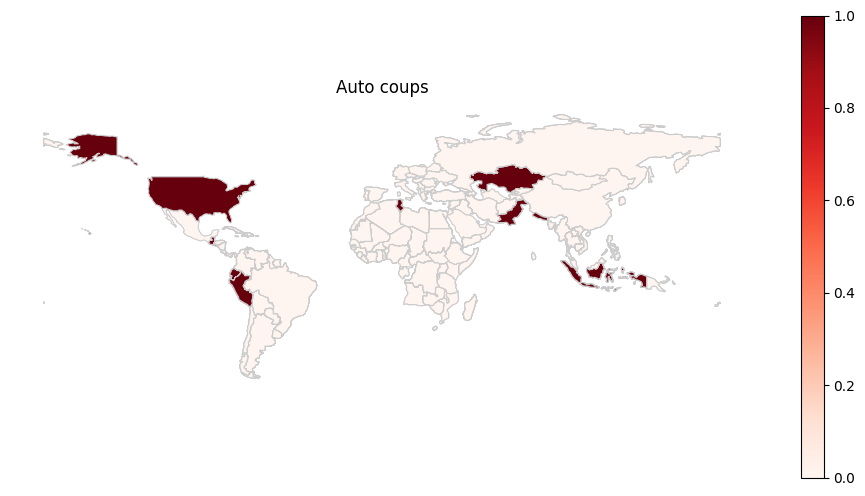

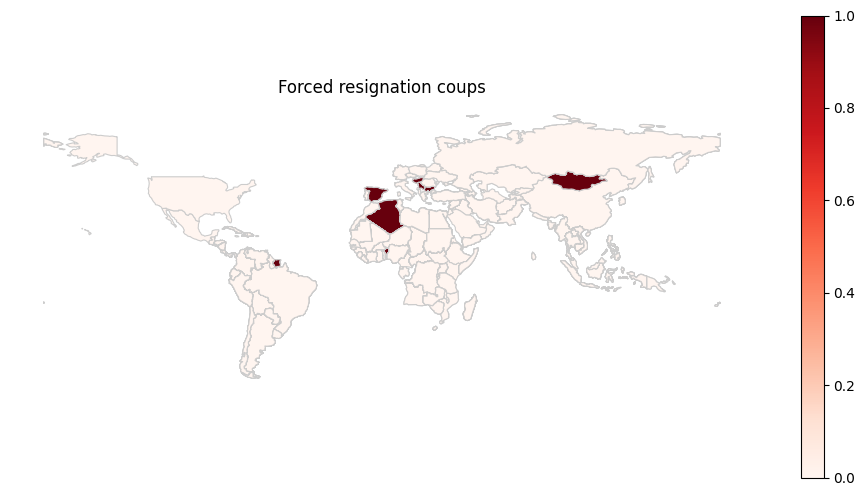

In [32]:
columns = ['realized', 'palace', 'auto', 'resign']
percentages = []
for column in columns:
    counts = dict(df[column].value_counts())
    percentages.append(counts[1]/(counts[0]+counts[1])*100)
data = {
    'type': columns,
    '% occurence': percentages
}
bar_plot(data, 'type', '% occurence', 'Within-government coups')

within_government_df = df[['country', 'palace', 'auto', 'resign']]
plot_world_map(within_government_df, 'palace', 'Palace coups')
plot_world_map(within_government_df, 'auto', 'Auto coups')
plot_world_map(within_government_df, 'resign', 'Forced resignation coups')

Palace coups seem to happen in those countries with a very strong government officials with a very high command and 1D in structure with all the power among a select group of people and sometimes the military becomes a wing of the civilian governemnt like in China.

Auto coups seem to occur in those countries with a strong seperation between government and military and any action taken must be through the judiciary and rulings like in the USA.

Forced resignations happen when all the parts of the incumbent government fail to respond to the protesting and demanding public, e.g., the Arab Spring leading to the forced resignition of Gaddafi of Libya.

### Which countries had foreign backed coups?

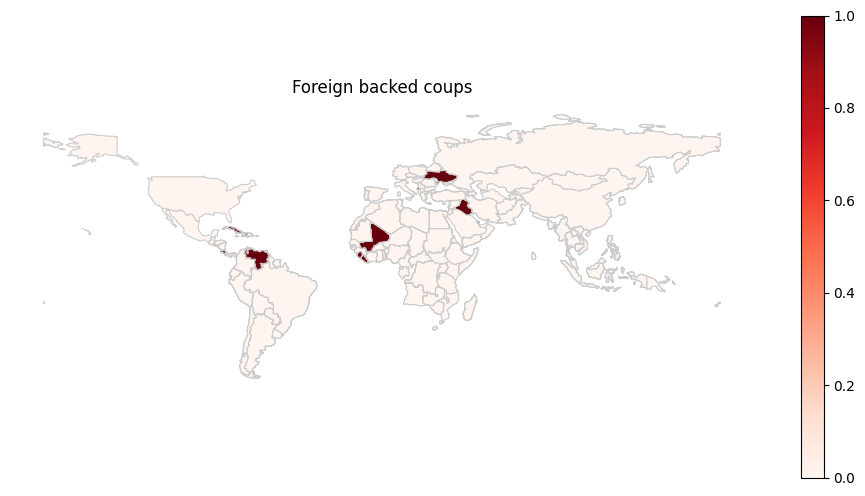

In [33]:
plot_world_map(df[['country', 'foreign']], 'foreign', 'Foreign backed coups')

Foreign backed coups is a much slower and people oriented process (atleast the recent ones) where the public perspective is manipulated and swayed through social media, news, journals, etc, through which the foreign power tries to topple the incumbent government to fulfill their agenda, e.g., Russia and USA's involvement in the many coups and political uprisings in Ukraine and Syria.

And the recent coup in Niger is also a foreign bakced coup where the coup supporter is Russia.

### Which countries had popular coups and also a change in mind leading to counter coups?

% popular among the people: 9.79
% success: 83.33


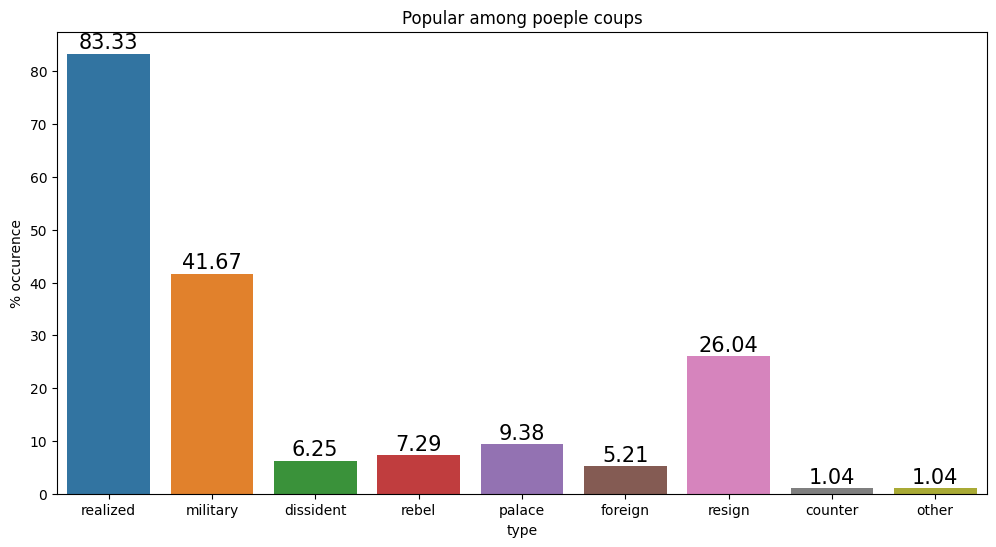

In [34]:
popular_df = df[df['popular']==1]
success = dict(popular_df['realized'].value_counts())
print("% popular among the people: {:.2f}" .format(len(popular_df)/len(df)*100))
print("% success: {:.2f}" .format(success[1]/(success[0]+success[1])*100))
columns = ['realized', 'military', 'dissident', 'rebel', 'palace', 'foreign', 'resign', 'counter', 'other']
percentages = []
for column in columns:
    counts = dict(popular_df[column].value_counts())
    percentages.append(counts[1]/(counts[0]+counts[1])*100)
data = {
    'type': columns,
    '% occurence': percentages
}
bar_plot(data, 'type', '% occurence', 'Popular among poeple coups')

Popular coups seem to be the most effective means of coup. This goes to show that the people of the country are a very important factor when staging a coup. Popular coups seem to lead to a lot of resignations and very few counter-coups which shows that poeple's involvement is most important in building a strong foundation for any governing body.

### Which countries have had coups classified as others?

In [44]:
other_df = df[df['other']==1]
other_df[['country', 'year', 'realized', 'attempt', 'conspiracy']]

,country,year,realized,attempt,conspiracy
112,Bolivia,1984,0,1,0
203,Comoros,1978,1,0,0
204,Comoros,1989,1,0,0
206,Comoros,1995,1,0,0
274,Dominican Republic,1965,0,1,0
342,Gambia,2022,0,0,1
351,Germany,2022,0,0,1
437,Haiti,1994,1,0,0
498,Kazakhstan,2022,0,1,0
548,Libya,2013,0,1,0


These coups happen due to one of the same reasons mentioned above but the groups involved are unknown or someone not from the government or military.

# Summary
So a coup can happen in certain countries, there are certain preconditions that need to be met for a coup to happen, successful or not.

Combining all the points above, I can summerize the preconditions to be the following:
1. The social and economic conditions of the target country must be such that the political participation is confined to a very small fraction of the population, the majority of the people are disempowered and a very small elite controls all the power. If you have such a situation then a country is ripe for a coup as you have a singular point of attack. Like in kingdoms and single party states like Russia where the coup led by Vladimir Lenin and the Bolshevik Party that ultimately resulted in the overthrow of the Provisional Government and the establishment of Bolshevik rule in Russia, this revolution is known as the "Bolshevik revolution" or "October revolution".

2. The target country must be substantially independent and the influence of foreign powers/actors inside its internal political landscape must be relatively limited for a successful internal coup else if there is substantial influence from outside through foreign funded NGOs and political parties, this can lead to a popular, foreign backed coup like the Euromaiden protest and susequent ousting of the then-President Yanukovych.

3. The political power must be centralized, if they are not centralized the multiple centers of power must be structured politically for a coup and not ethnically or linguistically or by religion. If that were the case then there is a high possibility of coups or insurgencies like the Chechen Insurgency, Tamil Tigers Insurgency, Naxalite-Maoist Insurgency, etc, which are all failed insurgencies as they didn't target or harness enough power to solidify their positions.

### What about India? Is India safe?
Based on the three pre-conditions, India will not experience a coup (it might face an emergency here and there due to external influences and hoarding of power by the center).

The reasoning:
1. The people of India have the right to vote and the leadership changes frequently (every 5 to 15 years), so no political entity can gather great political or military (the Indian military is not involved and never be in political matters).
2. The country is however is not indpendent politically and is vulnerable to external influences through foreign funded NGOs and political parties which try and meddle with internal decision making and reputation of the country.
3. The nation's political structure is linguistically split up thus making it very impervious to a possibilty of a coup. Adding to this the government's resposibilities and power and well defined and split between the central and state government into union list, state list, and concurrent list.

So based on points 1 and 3 India will never face any succesful coups.

# Citations

* The codebook:

Peyton, Buddy, Joseph Bajjalieh, Dan Shalmon, Michael Martin, Jonathan Bonaguro, and Scott Althaus. 2023. “Cline Center Coup d’État Project Dataset Codebook”. Cline Center Coup d’État Project Dataset. Cline Center for Advanced Social Research. V.2.1.2. February 23. University of Illinois Urbana-Champaign. doi: 10.13012/B2IDB-9651987_V6

* The data (accessed on 12th August 2023):

Peyton, Buddy, Joseph Bajjalieh, Dan Shalmon, Michael Martin, Jonathan Bonaguro, and Emilio Soto. 2023. Cline Center Coup d’État Project Dataset. Cline Center for Advanced Social Research. V.2.1.2. February 23. University of Illinois Urbana-Champaign. doi: 10.13012/B2IDB-9651987_V6